In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_31.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

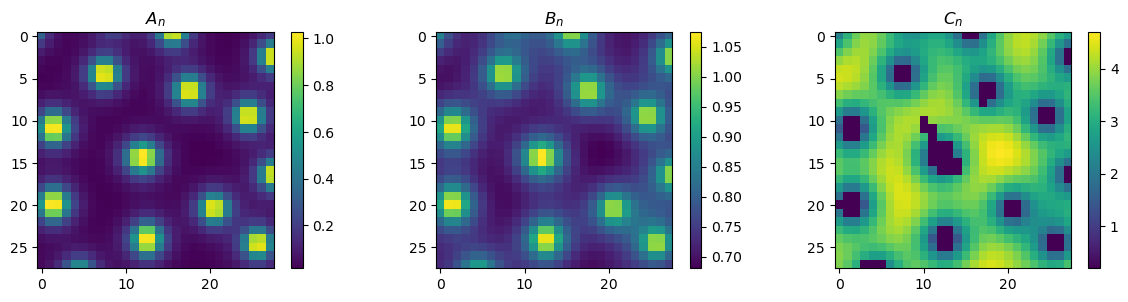

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

Epoch: 1 
 data loss:1.480407, 
data A loss:0.317928, data B loss:0.089392, data C loss:1.073087, 
Laplacian A loss:37.243928, Laplacian B loss:9.944618
Negative loss:0.070370




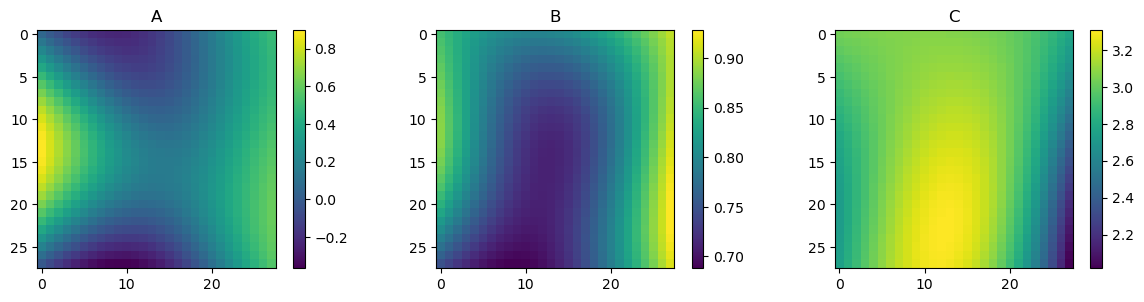

Epoch: 100 
 data loss:0.468868, 
data A loss:0.054235, data B loss:0.095679, data C loss:0.318954, 
Laplacian A loss:0.847012, Laplacian B loss:6.055844
Negative loss:0.020765




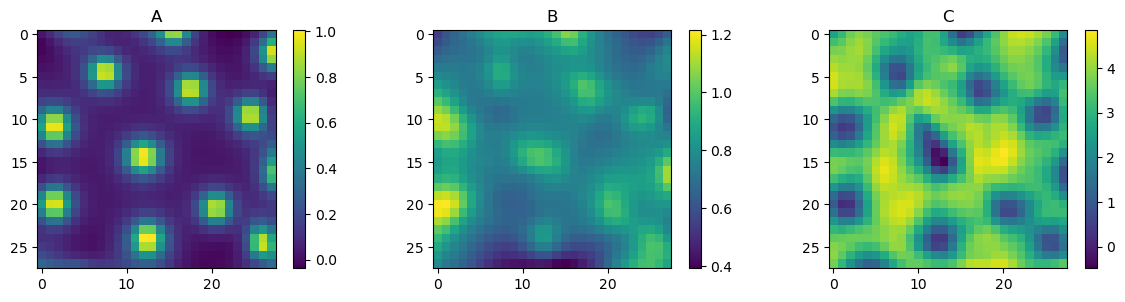

Epoch: 200 
 data loss:0.264050, 
data A loss:0.036582, data B loss:0.020340, data C loss:0.207128, 
Laplacian A loss:0.236109, Laplacian B loss:0.537439
Negative loss:0.015752




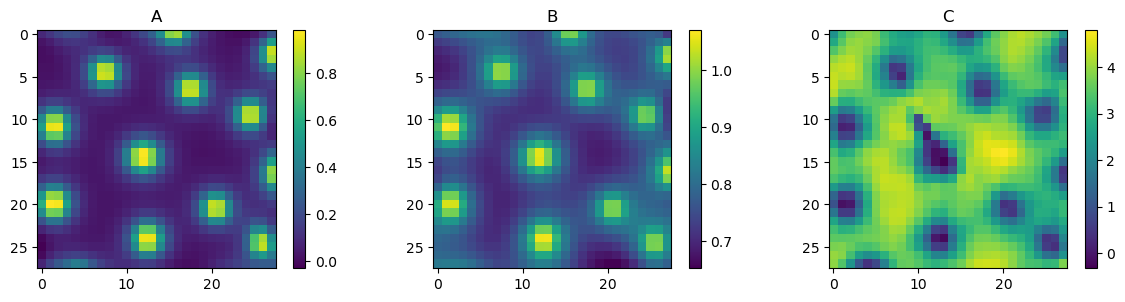

Epoch: 300 
 data loss:0.162901, 
data A loss:0.026313, data B loss:0.012044, data C loss:0.124544, 
Laplacian A loss:0.112812, Laplacian B loss:0.247941
Negative loss:0.012723




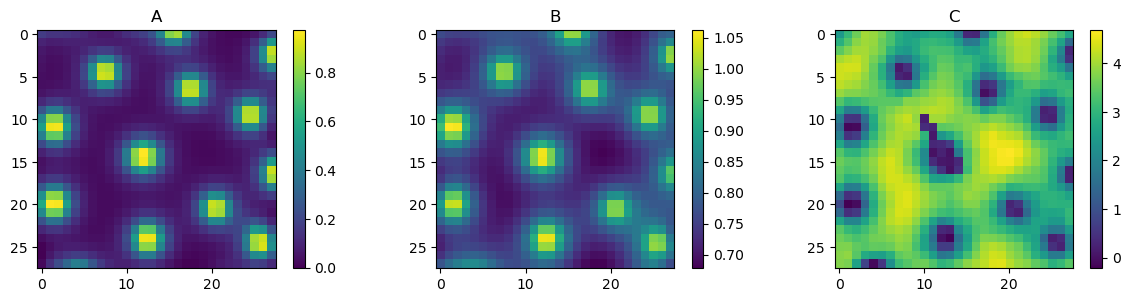

Epoch: 400 
 data loss:0.120195, 
data A loss:0.022284, data B loss:0.009453, data C loss:0.088458, 
Laplacian A loss:0.067942, Laplacian B loss:0.146299
Negative loss:0.016105




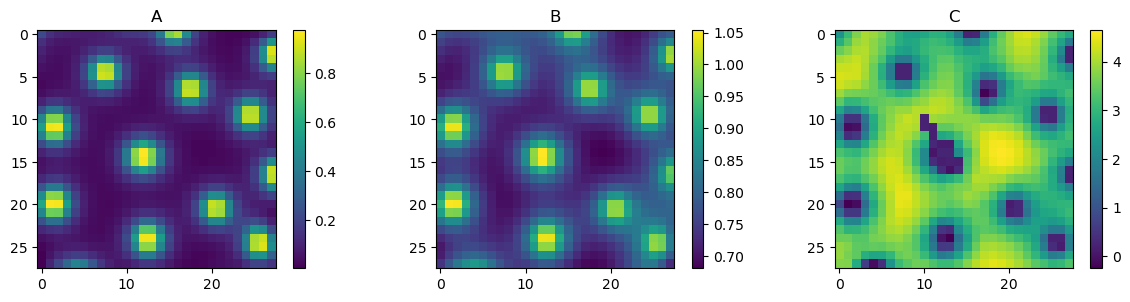

Epoch: 500 
 data loss:0.093783, 
data A loss:0.019944, data B loss:0.008192, data C loss:0.065648, 
Laplacian A loss:0.048968, Laplacian B loss:0.099275
Negative loss:0.010453




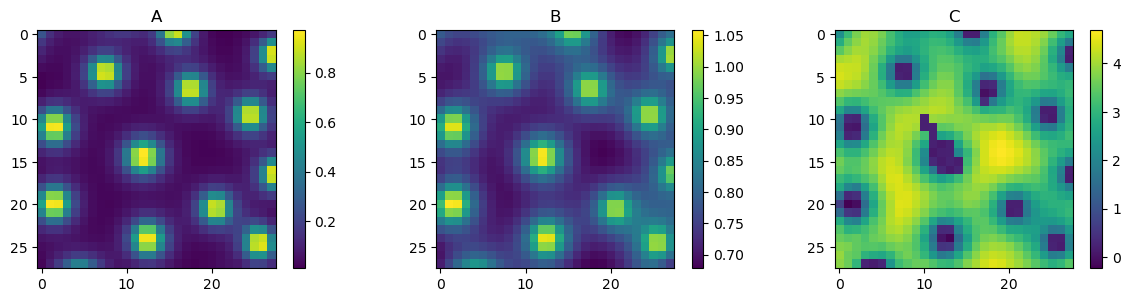

Epoch: 600 
 data loss:0.071525, 
data A loss:0.018792, data B loss:0.007320, data C loss:0.045414, 
Laplacian A loss:0.042196, Laplacian B loss:0.076546
Negative loss:0.007500




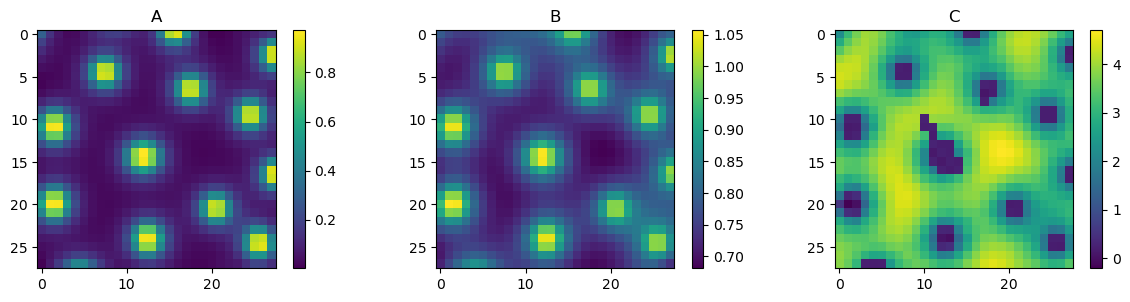

Epoch: 700 
 data loss:0.052154, 
data A loss:0.018300, data B loss:0.006820, data C loss:0.027033, 
Laplacian A loss:0.029708, Laplacian B loss:0.057887
Negative loss:0.000000




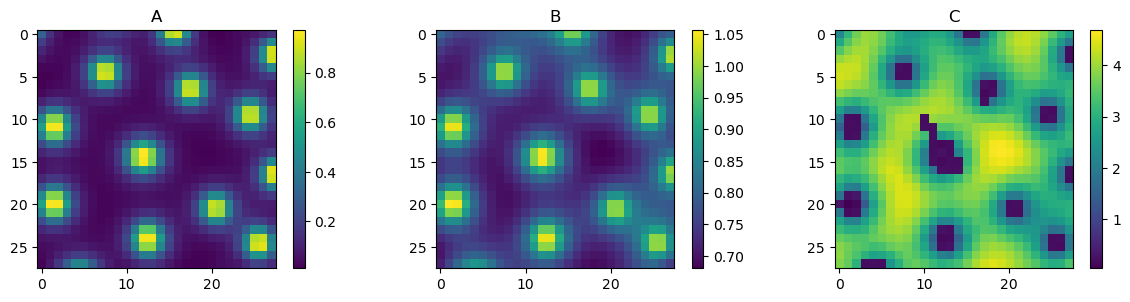

Epoch: 800 
 data loss:0.041412, 
data A loss:0.018048, data B loss:0.006484, data C loss:0.016881, 
Laplacian A loss:0.023301, Laplacian B loss:0.045493
Negative loss:0.000000




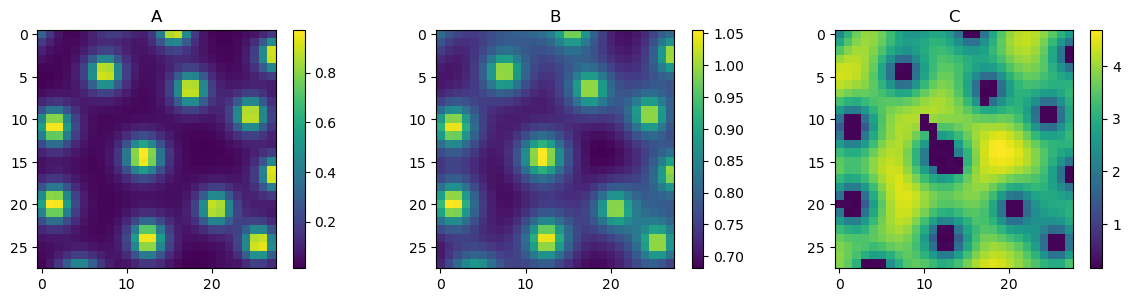

Epoch: 900 
 data loss:0.036063, 
data A loss:0.017907, data B loss:0.006289, data C loss:0.011866, 
Laplacian A loss:0.019326, Laplacian B loss:0.038777
Negative loss:0.000000




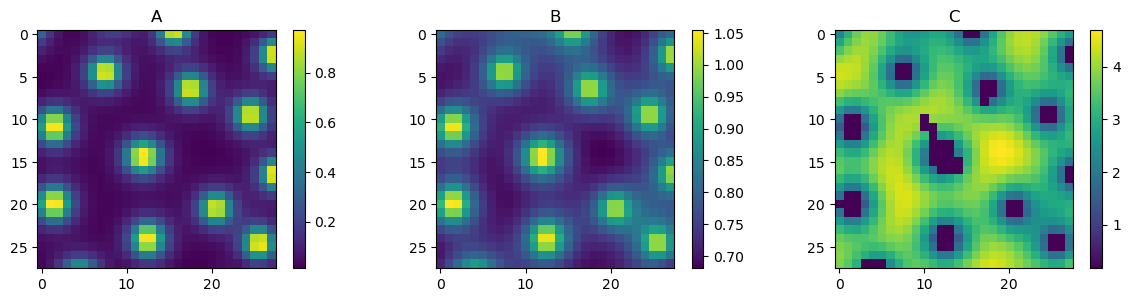

Epoch: 1000 
 data loss:0.032612, 
data A loss:0.017754, data B loss:0.006100, data C loss:0.008759, 
Laplacian A loss:0.017641, Laplacian B loss:0.033216
Negative loss:0.000000




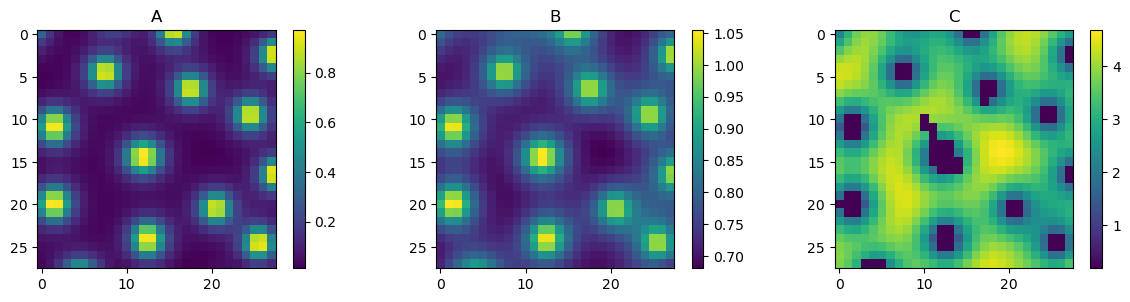

Epoch: 1100 
 data loss:0.030569, 
data A loss:0.017643, data B loss:0.005942, data C loss:0.006984, 
Laplacian A loss:0.016026, Laplacian B loss:0.029297
Negative loss:0.000000




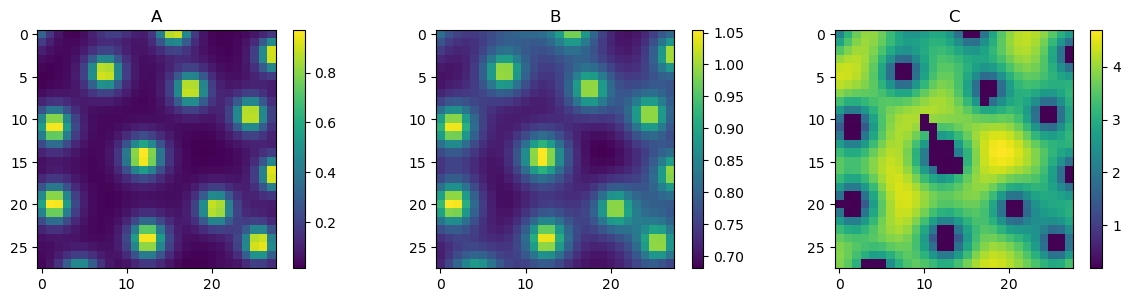

Epoch: 1200 
 data loss:0.029256, 
data A loss:0.017533, data B loss:0.005787, data C loss:0.005936, 
Laplacian A loss:0.014894, Laplacian B loss:0.026148
Negative loss:0.000000




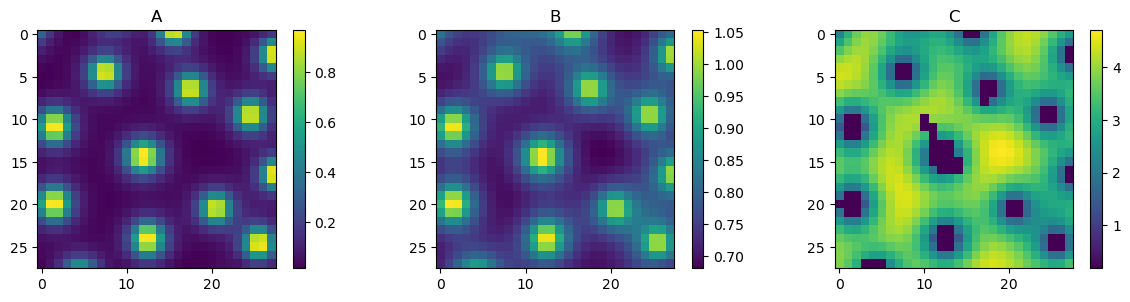

Epoch: 1300 
 data loss:0.028232, 
data A loss:0.017409, data B loss:0.005603, data C loss:0.005220, 
Laplacian A loss:0.013985, Laplacian B loss:0.023448
Negative loss:0.000000




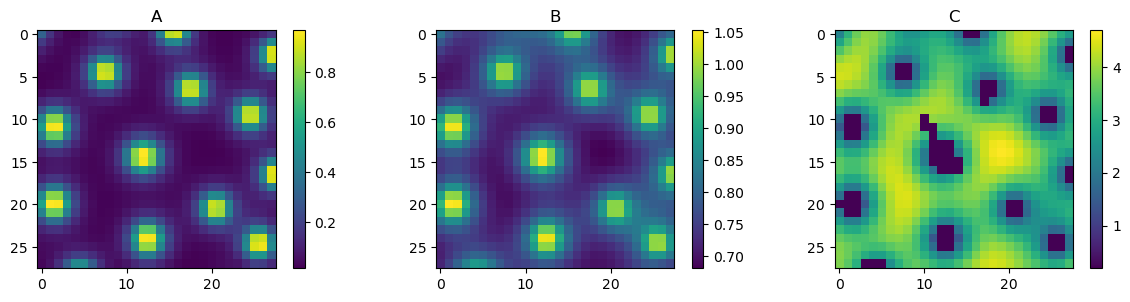

Epoch: 1400 
 data loss:0.027524, 
data A loss:0.017305, data B loss:0.005437, data C loss:0.004782, 
Laplacian A loss:0.013443, Laplacian B loss:0.021847
Negative loss:0.000000




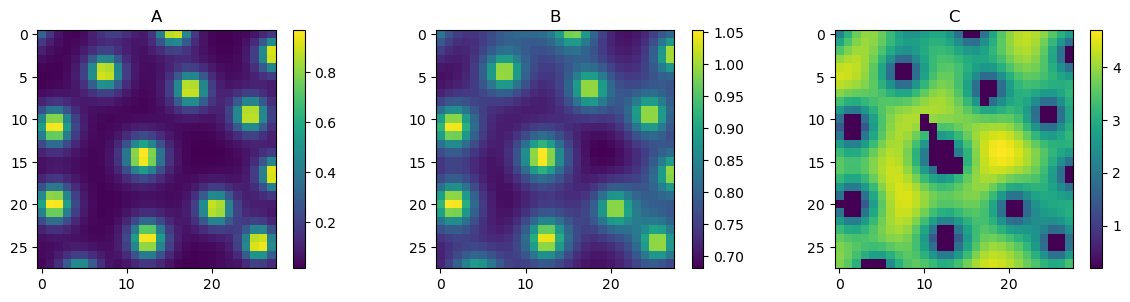

Epoch: 1500 
 data loss:0.027524, 
data A loss:0.017305, data B loss:0.005437, data C loss:0.004782, 
Laplacian A loss:0.013443, Laplacian B loss:0.021847
Negative loss:0.000000




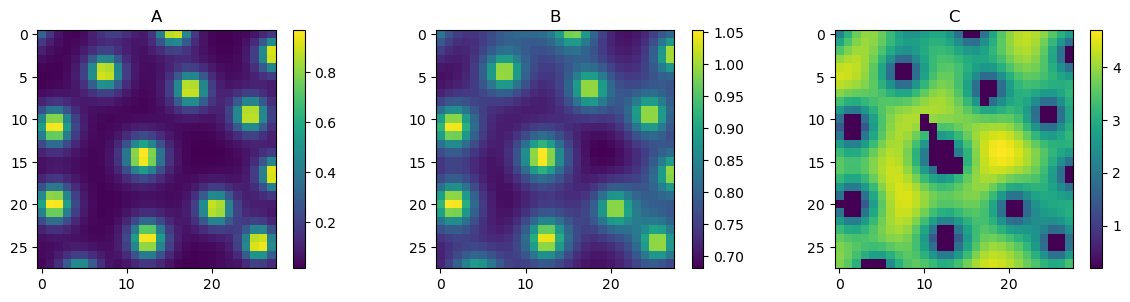

In [22]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[800,800,800,800], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.LBFGS([*model.parameters()], lr=1
                             ,line_search_fn='strong_wolfe')#.Adam([*model.parameters()], lr=1e-4)#


epochs = 1500
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((6, epochs))

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return  km**n / (x**n + km**n)

# last_loss = np.inf
# early_stop = False
for i in range(epochs ):
    flg_new_call = True
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # physics derivatives
        A = data_A_hat
        B = data_B_hat
        C = data_C_hat

        laplacianA_hat = Laplacian(A, data_X)
        laplacianB_hat = Laplacian(B, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
#     if i < epochs and last_loss > np.sum(losses[:,i]):
#         last_loss =  np.sum(losses[:,i])
#         if i > 200:
#             torch.save(model.state_dict(), "./04_outputs/model_LBFGS_Field_only_non_stationary_31")
            
#     elif np.sum(losses[:,i]) < last_loss:
#         ls = np.sqrt(losses[:, i])
#         print("============================================")
#         print(f"Stoped at {i+1}")
#         print("============================================")
#         print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
#               f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
#               f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
#               f"Negative loss:{ls[5]:.6f}\n"
#               f"\n"
#              )
#         data_f_hat = model(data_X)        
#         data_A_hat = data_f_hat[0].squeeze() 
#         data_B_hat = data_f_hat[1].squeeze() 
#         data_C_hat = data_f_hat[2].squeeze() 
#         plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
#                    to(data_B_hat.cpu().detach().numpy()), 
#                    to(data_C_hat.cpu().detach().numpy())], 
#            ["A","B","C"],          
#         figsize=(12, 3)); plt.tight_layout();plt.show() 
#         early_stop = True
#         break
    
    if (i+1)%100 == 0 or i==0 :
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Negative loss:{ls[5]:.6f}\n"
              f"\n"
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 
        
# if not early_stop:
#     model = Net_sep_dense_normalised(2,3,[ 512, 512, 512], lb, ub)
#     model.load_state_dict(torch.load("./04_outputs/model_LBFGS_Field_only_non_stationary_31"))
#     model.to(device)

In [6]:
# Epoch: 2000 
#  data loss:0.017706, 
# data A loss:0.009478, data B loss:0.003648, data C loss:0.004581, 
# Laplacian A loss:0.002905, Laplacian B loss:0.006424
# Negative loss:0.000000
# ============================================
# No negative reg
# Stoped at 115182
# ============================================
# Epoch: 115182 
#  data loss:0.020351, 
# data A loss:0.015148, data B loss:0.003904, data C loss:0.001299, 
# Laplacian A loss:0.018498, Laplacian B loss:0.008118
# Negative loss:0.000000
# ###############################
# #With negative constraint
# Epoch: 120000 
#  data loss:0.025821, 
# data A loss:0.015519, data B loss:0.004408, data C loss:0.005895, 
# Laplacian A loss:0.020208, Laplacian B loss:0.013363
# Negative loss:0.000000
    
# smallest 0.022430350179195667  

# Plot the trained outputs

A RMSE:0.0173048721208181 B RMSE:0.00543680871576612 C RMSE:0.004781873004147762
F_A actual:0.13908446391616117, F_A:0.11282895505428314, RMSE: 0.04969762654277226
F_B actual:99.01843878866238, F_B:72.9409408569336, RMSE: 1.5924482892277805
F_C actual:5.319317960080423e-29, F_C:0.0004785938945133239, RMSE: 0.02187678860638239

Laplacian A RMSE: 0.013443404281926837
Laplacian B RMSE: 0.021847482549417485

dAdt RMSE: 0.04971121757443472
dBdt RMSE: 1.5933810523040215
dCdt RMSE: 0.02187678860638239


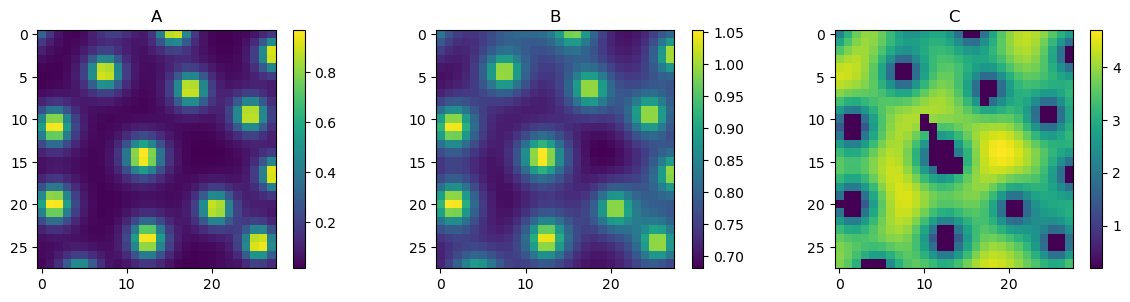

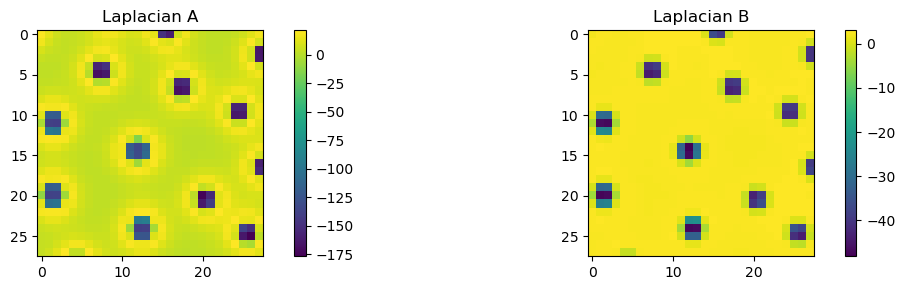

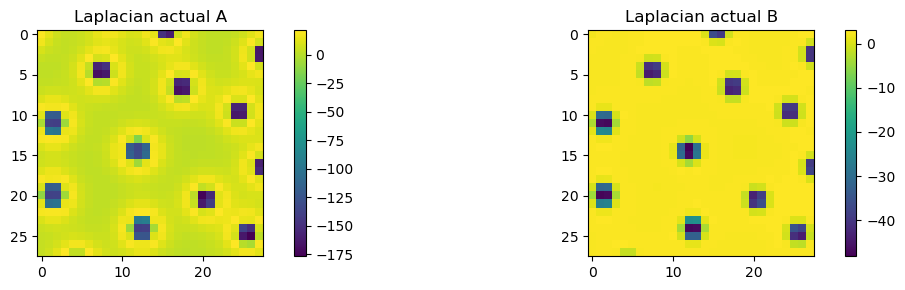

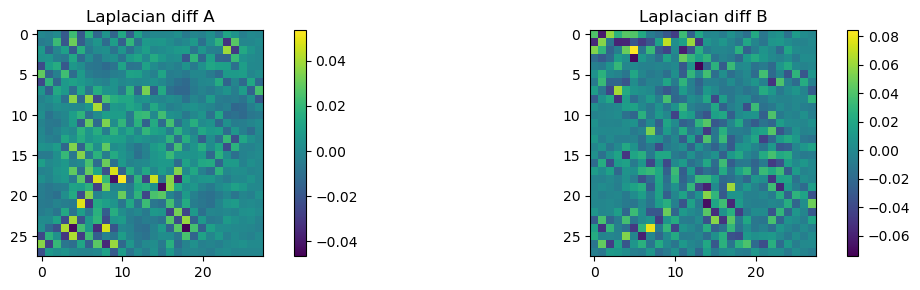

In [23]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

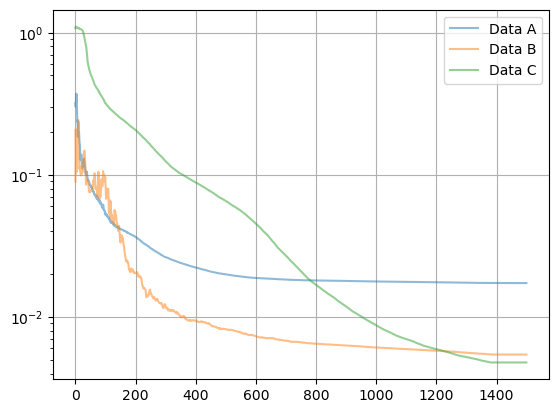

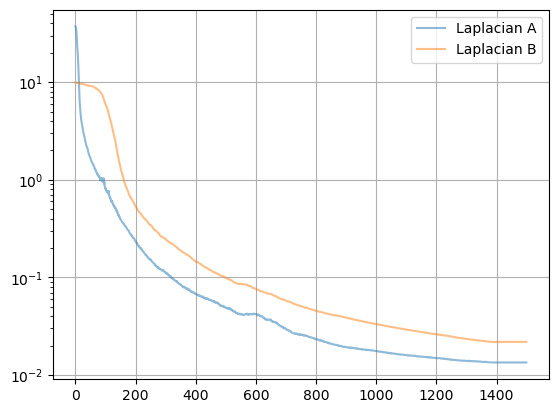

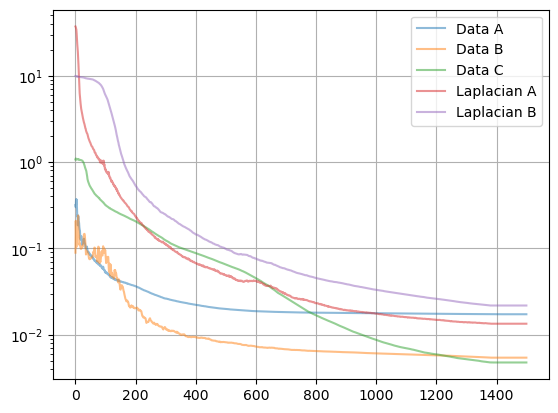

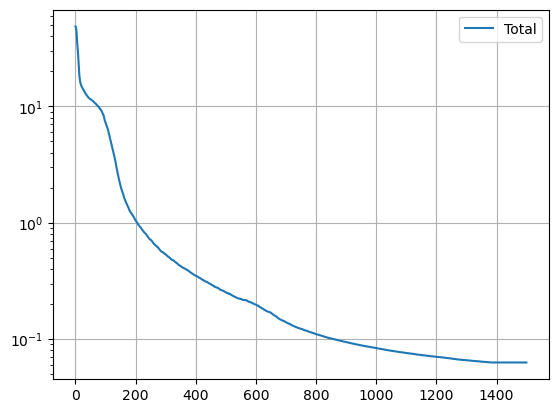

In [24]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

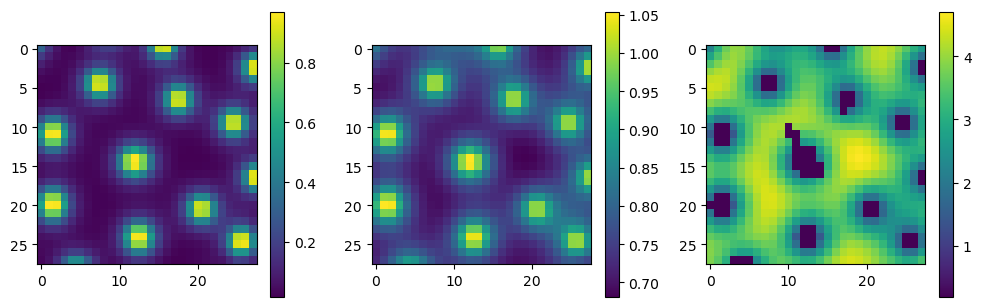

In [25]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.00029945859911786757
2.9558889011830447e-05
2.2866309427797144e-05


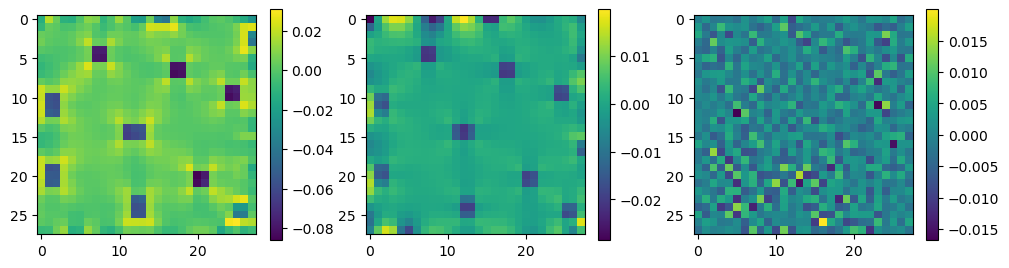

In [26]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.mean((A_hat-A)**2))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.mean((B_hat-B)**2))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.mean((C_hat-C)**2))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [27]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = to(Laplacian(A_hat, data_X).cpu().detach().numpy().astype(np.float64))
laplacianB_hat = to(Laplacian(B_hat, data_X).cpu().detach().numpy().astype(np.float64))

A_hat = to(A_hat.cpu().detach().numpy().astype(np.float64))
B_hat = to(B_hat.cpu().detach().numpy().astype(np.float64))
C_hat = to(C_hat.cpu().detach().numpy().astype(np.float64))

# A_hat = A_n[1:-1, 1:-1]#[x_slice, y_slice]
# B_hat = B_n[1:-1, 1:-1]#[x_slice, y_slice]
# C_hat = C_n[1:-1, 1:-1]#[x_slice, y_slice]

diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA_hat = laplacianA[x_slice, y_slice]
laplacianB_hat = laplacianB[x_slice, y_slice]
    
D_A=params["D_A"]
D_B=params["D_B"]
n = params['n']
mu_C=params["D_A"]

A_min, A_max = np.min(A_hat), np.max(A_hat)
B_min, B_max = np.min(B_hat), np.max(B_hat)
C_min, C_max = np.min(C_hat), np.max(C_hat)
tol = .01

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)


b_A =1#0005#params["b_A"]# 0
b_B =1# 0.5#params["b_B"]#0
b_C =1# 0.5#params["b_C"]#0
V_A =1# 4#params["V_A"]#0
V_B =1# 19#params["V_B"]#0
V_C =1# 19#params["V_C"]#0
mu_A =1# 0.05#params["mu_A"]#
mu_B =1# .4#params["mu_B"]#

K_AA = K_AA_init#params["K_AA"]#K_AA_init
K_AB = K_AB_init#params["K_AB"]#K_AB_init
K_AC = K_AC_init#params["K_AC"]#K_AC_init
K_BA = K_BA_init#params["K_BA"]#K_BA_init
K_BC = K_BC_init#params["K_BC"]#K_BC_init
K_CB = K_CB_init#params["K_CB"]#K_CB_init
K_CC = K_CC_init


params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

def physics_loss(args):            
    (b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC) = args
 

    F_A_hat =  b_A + V_A*act(A_hat, K_AA, n)*inh(B_hat, K_BA, n) - mu_A * A_hat
    #f_A =  e(b_A)/(e(D_A)+1e-6) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n)/(e(D_A)+1e-6) - e(mu_A)*A/(e(D_A)+1e-6)
    F_B_hat =  b_B + V_B*act(A_hat, K_AB, n)*inh(C_hat, K_CB, n) - mu_B * B_hat
    #f_B =  e(b_B)/(e(D_B)+1e-6) + e(V_B)*act(A, e(K_AB), n)*inh(C, e(K_CB), n)/(e(D_B)+1e-6) - e(mu_B)*B/(e(D_B)+1e-6)
    F_C_hat =  b_C + V_C*inh(A_hat, K_AC, n)*inh(B_hat, K_BC, n)*act(C_hat, K_CC, n) - mu_C * C_hat

    
    #dAdt = e(D_A) * laplacianA + F_A
    dAdt = D_A * laplacianA_hat + F_A_hat
    #dAdt2 = laplacianA + f_A
    #dBdt = e(D_B) * laplacianB + F_B
    dBdt = D_B * laplacianB_hat + F_B_hat
    #dBdt2 = laplacianB + f_B
    dCdt = F_C_hat
    ################################
    # physics loss
    # Construct the physics loss here
    A_loss_physics = np.mean(dAdt**2)
    #A2_loss_physics = torch.mean(dAdt2**2)
    B_loss_physics = np.mean(dBdt**2)
    #B2_loss_physics = torch.mean(dBdt2**2)
    C_loss_physics = np.mean(dCdt**2)
    
    return (A_loss_physics + B_loss_physics + C_loss_physics)
i = 0
def print_callback(x):
    global i
    
    if (i+1)%100 == 0 or i == 0:
        print(f"iteration:{i+1}, loss: {physics_loss(x):.8f} ", 
          f", ".join([f"{name}={l:.4f}" 
                 for l, name in zip(x, params_name_list)]))
    i += 1
from scipy.optimize import minimize

bounds = [(0, None),(0, None),(0, None), # b_A, b_B, b_C
          (0, None),(0, None),(0, None), # V_A, V_B, V_C
          (0, None),(0, None), # mu_A, mu_B
          K_AA_bound, K_AB_bound, K_AC_bound,
          K_BA_bound, K_BC_bound,
          K_CB_bound,
          K_CC_bound,
         ]

res = minimize(physics_loss, params_list, bounds=bounds,
               tol=1e-16,
               options={'maxiter':2e4, 'maxfun':1e6},
               method="L-BFGS-B",#"L-BFGS-B",#"Nelder-Mead",# 
               callback=print_callback)
print("==============================================")
i=0
bounds = [(0, None) for _ in params_list]
res_unbound = minimize(physics_loss, params_list, bounds=bounds,
               tol=1e-16,
               options={'maxiter':2e4, 'maxfun':1e6},
               method="L-BFGS-B",#"L-BFGS-B",#"Nelder-Mead",# 
               callback=print_callback)

# print(", ".join([f"{name}={l:.4f}" 
#                  for l, name in zip(res.x, params_name_list)]))


iteration:1, loss: 93.87057331  b_A=0.0000, b_B=0.9699, b_C=0.0000, V_A=1.0114, V_B=1.4732, V_C=0.9197, mu_A=1.1028, mu_B=0.0000, K_AA=1.4990, K_AB=0.4158, K_AC=1.5255, K_BA=1.5580, K_BC=1.5434, K_CB=7.3800, K_CC=7.4206
iteration:100, loss: 0.43699976  b_A=0.0016, b_B=6.0659, b_C=0.0211, V_A=8.6746, V_B=106.7872, V_C=1.3100, mu_A=0.9813, mu_B=11.6687, K_AA=1.1551, K_AB=0.9505, K_AC=1.5248, K_BA=2.7072, K_BC=1.0323, K_CB=3.1106, K_CC=9.1976
iteration:200, loss: 0.35133328  b_A=0.0000, b_B=1.3448, b_C=0.0111, V_A=9.2601, V_B=94.6238, V_C=1.0617, mu_A=0.6991, mu_B=5.4392, K_AA=1.1796, K_AB=0.9156, K_AC=1.5247, K_BA=2.0871, K_BC=1.2280, K_CB=2.2734, K_CC=8.9460
iteration:300, loss: 0.34525587  b_A=0.0147, b_B=1.2882, b_C=0.0127, V_A=9.2703, V_B=94.2571, V_C=1.0138, mu_A=1.1362, mu_B=5.3648, K_AA=0.8506, K_AB=0.9141, K_AC=1.5247, K_BA=0.9973, K_BC=1.2035, K_CB=2.2649, K_CC=8.9803
iteration:400, loss: 0.34524598  b_A=0.0147, b_B=1.2963, b_C=0.0146, V_A=9.2297, V_B=94.4126, V_C=0.9116, mu_A=1

iteration:2000, loss: 0.34517485  b_A=0.0153, b_B=1.2753, b_C=0.0185, V_A=14.5315, V_B=94.2949, V_C=0.8808, mu_A=1.1439, mu_B=5.3478, K_AA=0.8860, K_AB=0.9143, K_AC=1.5250, K_BA=0.8515, K_BC=1.8743, K_CB=2.2655, K_CC=9.9263
iteration:2100, loss: 0.34517485  b_A=0.0153, b_B=1.2748, b_C=0.0185, V_A=14.5376, V_B=94.2967, V_C=0.8803, mu_A=1.1442, mu_B=5.3472, K_AA=0.8860, K_AB=0.9143, K_AC=1.5250, K_BA=0.8514, K_BC=1.8759, K_CB=2.2655, K_CC=9.9261
iteration:2200, loss: 0.34517485  b_A=0.0153, b_B=1.2747, b_C=0.0185, V_A=14.5380, V_B=94.2970, V_C=0.8803, mu_A=1.1441, mu_B=5.3471, K_AA=0.8860, K_AB=0.9144, K_AC=1.5250, K_BA=0.8514, K_BC=1.8762, K_CB=2.2655, K_CC=9.9260
iteration:2300, loss: 0.34517485  b_A=0.0153, b_B=1.2749, b_C=0.0185, V_A=14.5404, V_B=94.2973, V_C=0.8803, mu_A=1.1441, mu_B=5.3473, K_AA=0.8860, K_AB=0.9144, K_AC=1.5250, K_BA=0.8514, K_BC=1.8767, K_CB=2.2655, K_CC=9.9260
iteration:2400, loss: 0.34517485  b_A=0.0153, b_B=1.2749, b_C=0.0185, V_A=14.5387, V_B=94.2967, V_C=0.88

In [28]:
res, res_unbound

(  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 0.3451745481849631
         x: [ 1.529e-02  1.275e+00 ...  2.265e+00  9.015e+00]
       nit: 1654
       jac: [ 7.883e-07 -3.164e-07 ... -1.077e-06  9.104e-07]
      nfev: 32000
      njev: 2000
  hess_inv: <15x15 LbfgsInvHessProduct with dtype=float64>,
   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
   success: True
    status: 0
       fun: 0.34514486880878065
         x: [ 1.533e-02  1.275e+00 ...  2.265e+00  2.483e+00]
       nit: 5337
       jac: [ 4.996e-08  2.776e-08 ... -2.220e-08  0.000e+00]
      nfev: 105168
      njev: 6573
  hess_inv: <15x15 LbfgsInvHessProduct with dtype=float64>)

In [29]:
estimated_params_np = dict()
estimated_unbound_params_np = dict()
for l,l2, name in zip(res.x, res_unbound.x, params_name_list):    
    estimated_params_np[name] = l
    estimated_unbound_params_np[name] = l2

In [30]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst.(unbound) \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"
                  f"{estimated_unbound_params_np[name]:.3f}\t\t"                 
                  f"{estimated_params_np[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params_np[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est.(unbound) 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.015		0.015		nan		(nan,nan)
b_B:	1.000		1.275		1.275		nan		(nan,nan)
b_C:	0.100		0.005		0.019		nan		(nan,nan)
V_A:	100.000		14.484		14.696		nan		(nan,nan)
V_B:	100.000		94.297		94.293		nan		(nan,nan)
V_C:	10.000		0.040		0.609		nan		(nan,nan)
mu_A:	1.000		1.144		1.144		nan		(nan,nan)
mu_B:	5.000		5.347		5.347		nan		(nan,nan)
K_AA:	1.000		0.886		0.887		0.005		(0.005,3.056)
K_AB:	1.000		0.914		0.914		0.005		(0.005,3.056)
K_AC:	1.000		1.619		1.526		0.005		(0.005,3.056)
K_BA:	0.500		0.852		0.848		0.216		(0.216,3.323)
K_BC:	0.500		7.487		1.788		3.323		(0.216,3.323)
K_CB:	25.000		2.265		2.265		0.062		(0.062,14.821)
K_CC:	1.000		2.483		9.015		14.821		(0.062,14.821)


In [31]:
def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str))
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str))


D_A=params["D_A"]#, sampled_D_A, sampled_D_A_grad = create_var()
D_B=params["D_B"]#, sampled_D_B, sampled_D_B_grad = create_var()
b_A = create_var()
b_B = create_var()
b_C = create_var()
V_A = create_var()
V_B = create_var()
V_C = create_var()
mu_A = create_var()
mu_B = create_var()
mu_C=params["D_A"]#, sampled_mu_C, sampled_mu_C_grad = create_var()
K_AA = create_var()
K_AB = create_var()
K_AC = create_var()
K_BA = create_var()
K_BC = create_var()
K_CB = create_var()
K_CC = create_var()
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]


In [32]:
   
def physics_loss():            
    physics_f = model(data_X)
    A_hat = physics_f[0].squeeze()
    B_hat = physics_f[1].squeeze()
    C_hat = physics_f[2].squeeze()
    
    laplacianA_hat = Laplacian(A_hat, data_X)
    laplacianB_hat = Laplacian(B_hat, data_X)    
    # To make sure the parameters stay positive, we use the exponential function    
    e = torch.exp
    F_A_hat =  e(b_A) + e(V_A)*act(A_hat, e(K_AA), n)*inh(B_hat, e(K_BA), n) - e(mu_A) * A_hat
    #f_A =  e(b_A)/(e(D_A)+1e-6) + e(V_A)*act(A, e(K_AA), n)*inh(B, e(K_BA), n)/(e(D_A)+1e-6) - e(mu_A)*A/(e(D_A)+1e-6)
    F_B_hat =  e(b_B) + e(V_B)*act(A_hat, e(K_AB), n)*inh(C_hat, e(K_CB), n) - e(mu_B) * B_hat
    #f_B =  e(b_B)/(e(D_B)+1e-6) + e(V_B)*act(A, e(K_AB), n)*inh(C, e(K_CB), n)/(e(D_B)+1e-6) - e(mu_B)*B/(e(D_B)+1e-6)
    F_C_hat =  e(b_C) + e(V_C)*inh(A_hat, e(K_AC), n)*inh(B_hat, e(K_BC), n)*act(C_hat, e(K_CC), n) - mu_C * C_hat

    
    #dAdt = e(D_A) * laplacianA + F_A
    dAdt = D_A * laplacianA_hat + F_A_hat
    #dAdt2 = laplacianA + f_A
    #dBdt = e(D_B) * laplacianB + F_B
    dBdt = D_B * laplacianB_hat + F_B_hat
    #dBdt2 = laplacianB + f_B
    dCdt = F_C_hat
    ################################
    # physics loss
    # Construct the physics loss here
    A_loss_physics = torch.mean(dAdt**2)
    #A2_loss_physics = torch.mean(dAdt2**2)
    B_loss_physics = torch.mean(dBdt**2)
    #B2_loss_physics = torch.mean(dBdt2**2)
    C_loss_physics = torch.mean(dCdt**2)
    return (A_loss_physics + B_loss_physics + C_loss_physics)


optimizer2 = torch.optim.LBFGS(params_list,
                               lr=.2,
                               history_size=10, 
                               max_iter=20, 
                               line_search_fn="strong_wolfe")

# L-BFGS
def closure():
    if torch.is_grad_enabled():
        optimizer2.zero_grad()
    loss = physics_loss()
    if loss.requires_grad:
        loss.backward()
    return loss

history_lbfgs = []
stored_parameters = np.zeros(len(params_list))
for i in range(200):
    history_lbfgs.append(physics_loss().item())
    if np.all([not np.isnan(p.item()) for p in params_list]):
        stored_parameters = [np.exp(p.item()) for p in params_list]
    else:
        print("Nan -- (maybe large learning rate)")
        break
        
    if i%2 ==0:
        print(history_lbfgs[-1],", ".join([f"{name}={np.exp(l.item()):.4f}" 
                 for l, name in zip(params_list, params_name_list)]))
        print()
    optimizer2.step(closure)


126.29580688476562 b_A=2.7183, b_B=2.7183, b_C=2.7183, V_A=2.7183, V_B=2.7183, V_C=2.7183, mu_A=2.7183, mu_B=2.7183, K_AA=2.7183, K_AB=2.7183, K_AC=2.7183, K_BA=2.7183, K_BC=2.7183, K_CB=2.7183, K_CC=2.7183

30.18169403076172 b_A=0.0090, b_B=0.0096, b_C=0.0034, V_A=2.9748, V_B=83.0475, V_C=102.8516, mu_A=0.3399, mu_B=0.0053, K_AA=1.9074, K_AB=0.0056, K_AC=2.7199, K_BA=2.7361, K_BC=2.9865, K_CB=0.1709, K_CC=211.6160

29.44833755493164 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=3.1831, V_B=10360.6323, V_C=4634.4452, mu_A=0.0048, mu_B=0.0000, K_AA=0.9176, K_AB=0.0000, K_AC=2.7214, K_BA=2.7569, K_BC=3.2938, K_CB=0.0463, K_CC=9516.3495

29.444881439208984 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8736, V_B=154686.0637, V_C=34731.2695, mu_A=0.0005, mu_B=0.0000, K_AA=0.9016, K_AB=0.0000, K_AC=2.7222, K_BA=2.7442, K_BC=3.4689, K_CB=0.0236, K_CC=71240.4267

29.44487190246582 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8713, V_B=162989.0241, V_C=36126.0702, mu_A=0.0005, mu_B=0.0000, K_AA=0.8996, K_AB

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_B=0.0000, K_AA=0.8992, K_AB=0.0000, K_AC=2.7223, K_BA=2.7442, K_BC=3.4735, K_CB=0.0232, K_CC=74981.7764

29.444869995117188 b_A=0.0000, b_B=0.0000, b_C=0.0000, V_A=2.8706, V_B=165577.6754, V_C=36556.2356, mu_A=0.0005, mu_

In [33]:
estimated_params = dict()    
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = np.exp(l.item())

In [34]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEstimated \tEstimated(np) \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{estimated_params_np[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params_np[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Estimated 	Estimated(np) 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		0.015		nan		(nan,nan)
b_B:	1.000		0.000		1.275		nan		(nan,nan)
b_C:	0.100		0.000		0.019		nan		(nan,nan)
V_A:	100.000		2.871		14.696		nan		(nan,nan)
V_B:	100.000		165577.675		94.293		nan		(nan,nan)
V_C:	10.000		36556.236		0.609		nan		(nan,nan)
mu_A:	1.000		0.000		1.144		nan		(nan,nan)
mu_B:	5.000		0.000		5.347		nan		(nan,nan)
K_AA:	1.000		0.899		0.887		0.005		(0.005,3.056)
K_AB:	1.000		0.000		0.914		0.005		(0.005,3.056)
K_AC:	1.000		2.722		1.526		0.005		(0.005,3.056)
K_BA:	0.500		2.744		0.848		0.216		(0.216,3.323)
K_BC:	0.500		3.473		1.788		3.323		(0.216,3.323)
K_CB:	25.000		0.023		2.265		0.062		(0.062,14.821)
K_CC:	1.000		74981.776		9.015		14.821		(0.062,14.821)


In [35]:
import pickle

torch.save(model.state_dict(), "./04_outputs/model_LBFGS_Field_only_non_stationary_31")
with open('./04_outputs/model_LBFGS_Field_only_non_stationary_params_name_list_31.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./04_outputs/model_LBFGS_Field_only_non_stationary_losses_31.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./04_outputs/model_LBFGS_Field_only_non_stationary_estimated_params_31.pkl", "wb") as f:
    pickle.dump((dict(params), dict(estimated_params), dict(estimated_params_np)), f) 

In [20]:
# model = Net_sep_dense_normalised(2,3,[ 1024, 1024, 1024], lb, ub)
# model.load_state_dict(torch.load("./04_outputs/model_LBFGS_Field_only_non_stationary_31"))
# model = model.to(device)

In [ ]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

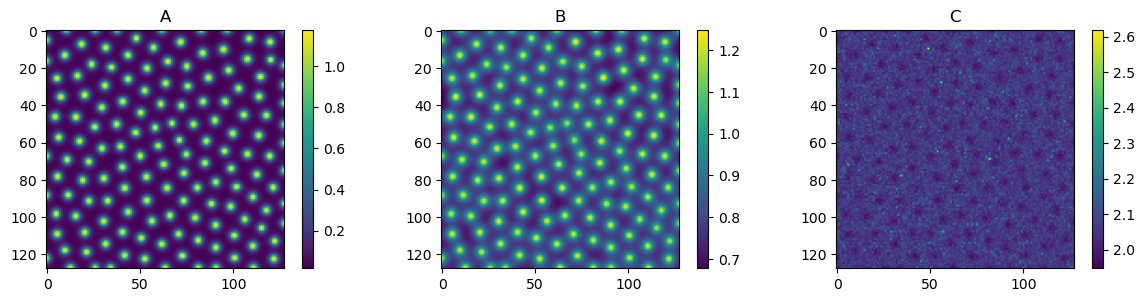

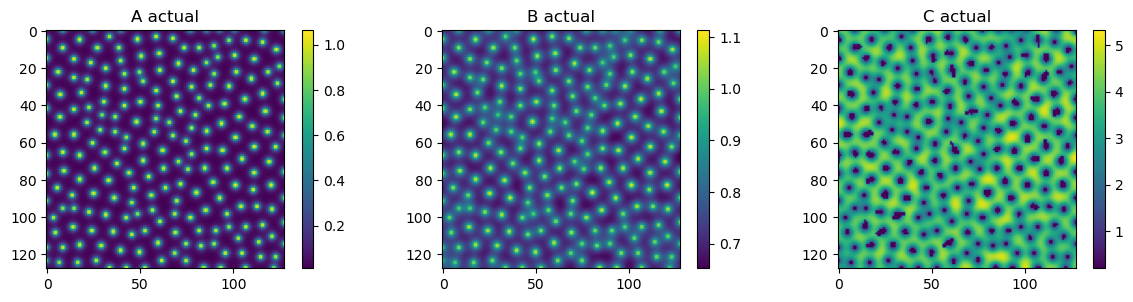

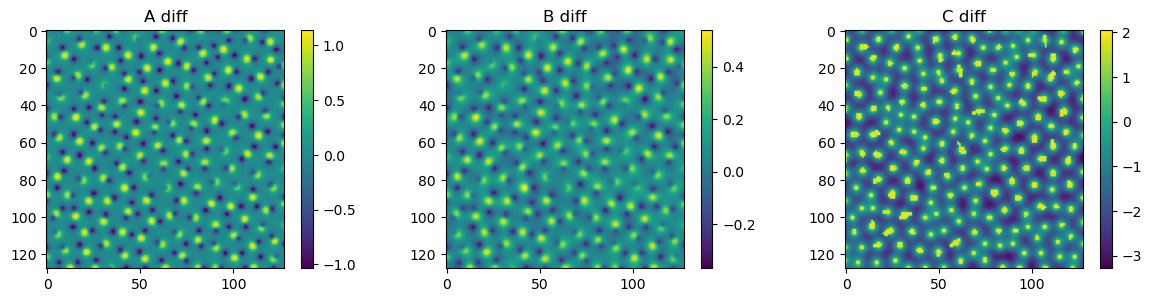

In [36]:

params2 = {}
for k,v in estimated_params_np.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 